In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
data = pd.read_csv('C:/Users/OM/Downloads/iphone_purchase.csv')
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
data.info

<bound method DataFrame.info of      Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]>

In [8]:
data.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [10]:
data.duplicated().mean()

0.05

In [11]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of      Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]>

In [16]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


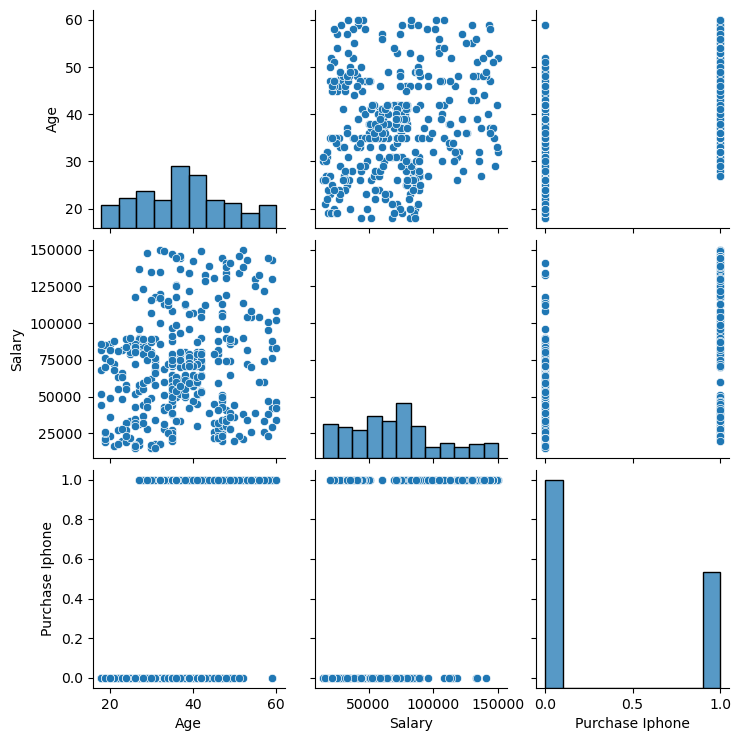

In [13]:
#pairplot
sns.pairplot(data)

C:\Users\OM\AppData\Local\Temp\ipykernel_7540\1887584206.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


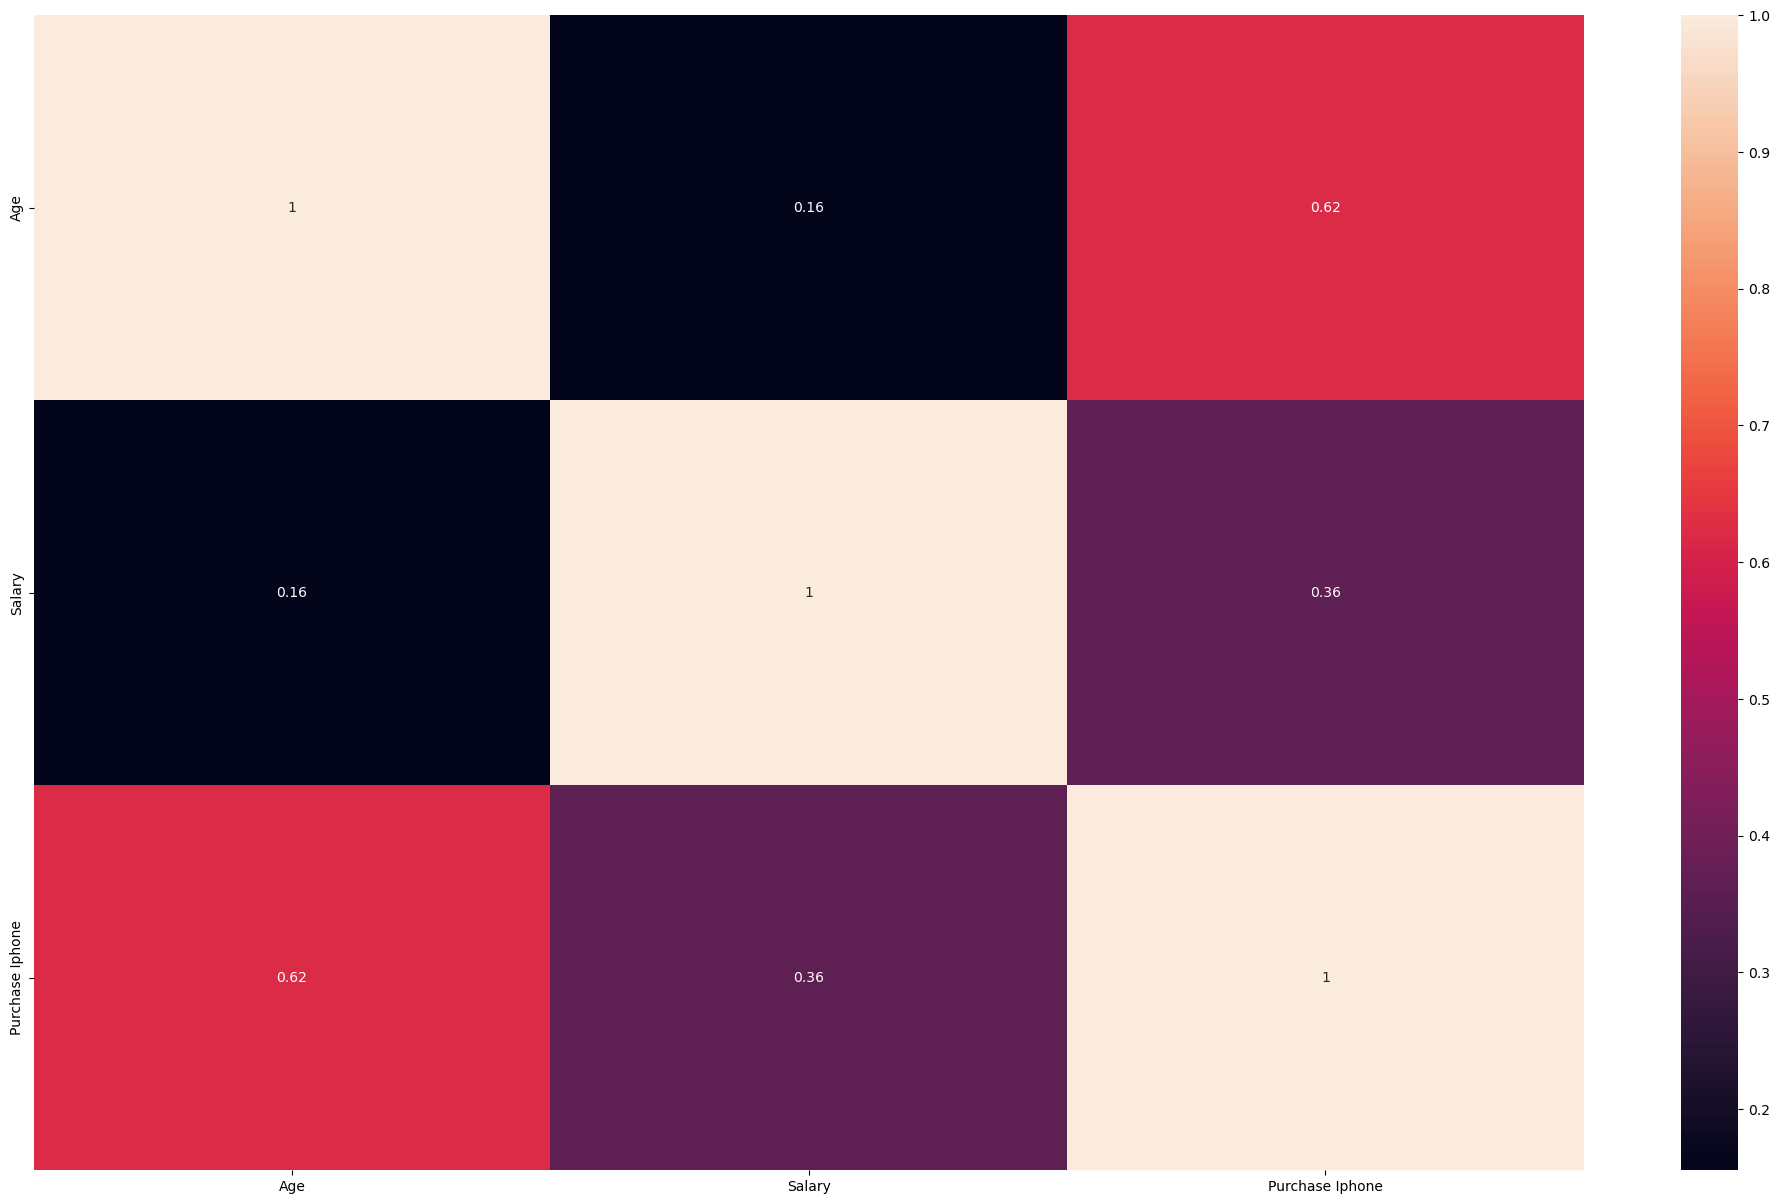

In [18]:
#heatmap
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

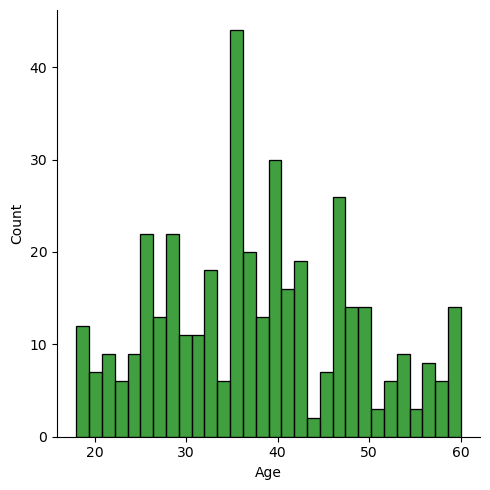

In [27]:
sns.displot(x = data['Age'],color='green',bins=30)

In [12]:
data.dtypes

Gender             object
Age                 int64
Salary              int64
Purchase Iphone     int64
dtype: object

In [19]:
#EDA in ONE html file
import pandas_profiling as pp
profile = pp.ProfileReport(data)
profile.to_file('iphone_purchase_EDA.html')

C:\Users\OM\AppData\Local\Temp\ipykernel_7540\503414704.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
# defaultdict LabelEncoding 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
# Encoding the variable
datalb = data.apply(lambda lb: d[lb.name].fit_transform(lb))

In [30]:
datalb.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [31]:
#Modeling
#knn
X = datalb.drop('Purchase Iphone', axis=1)
y = datalb['Purchase Iphone']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training is completed
Accuracy -  0.925
Misclassification -  0.07499999999999996


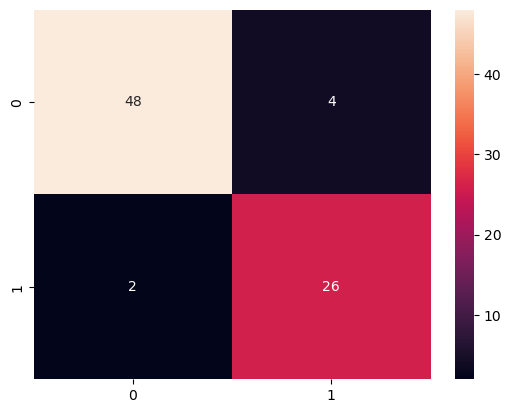

In [41]:
def knn_modelling (X_train,y_train,X_test):
    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn_train = model_knn.fit(X_train,y_train)
    print("Model Training is completed")
    pred_knn = model_knn_train.predict(X_test)
    return pred_knn
   
pred_knn = knn_modelling(X_train,y_train,X_test)
pred_knn

y_test

#diagonistics of classification model
#confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_knn)


sns.heatmap(confusion_matrix(y_test,pred_knn),annot = True)

accuracy_score(y_test,pred_knn)
1-accuracy_score(y_test,pred_knn)
print('Accuracy - ',accuracy_score(y_test,pred_knn))
print('Misclassification - ',1-accuracy_score(y_test,pred_knn))